<a href="https://colab.research.google.com/github/Batman2002/boilerplate-page-time-view-series-visualizer/blob/main/boilerplate_page_time_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read me
# Use the data to complete the following tasks:

# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
# The label on the x axis should be Date and the label on the y axis should be Page Views.
# # Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
# #  It should show average daily page views for each month grouped by year. 
# # The legend should show month labels and have a title of Months. 
# # On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". 
# These box plots should show how the values are distributed within a given year or month and how it compares over time.
#  The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality).
#  Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.
#  The boilerplate includes commands to prepare the data.


In [ ]:
df=pd.read_csv("fcc-forum-pageviews.csv",index_col='date',parse_dates=True)
clean=df[(df['value']>=df['value'].quantile(0.975)) ]
clean2=df[(df['value']<=df['value'].quantile(0.025))]
a=df.loc[clean.index]
df=df.drop(a.index)
b=df.loc[clean2.index]
df=df.drop(b.index)
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Veiws')

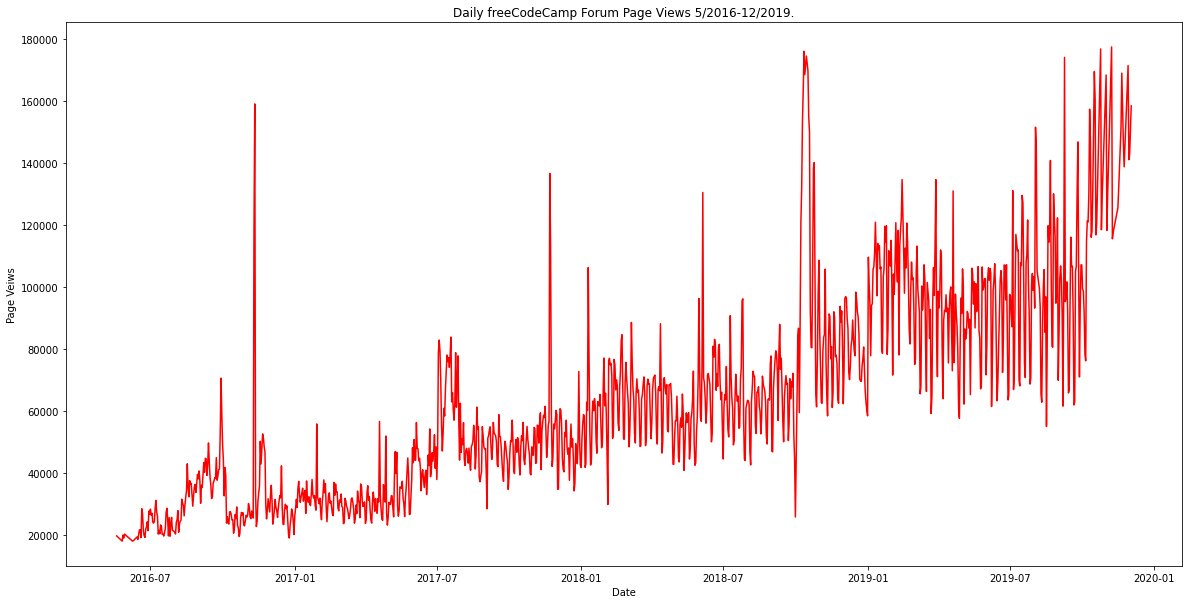

In [ ]:
df
plt.rcParams["figure.figsize"] = (20,10)
fig,ax=plt.subplots()
ax.plot(df,color='r')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019.")
plt.xlabel("Date")
plt.ylabel("Page Veiws")

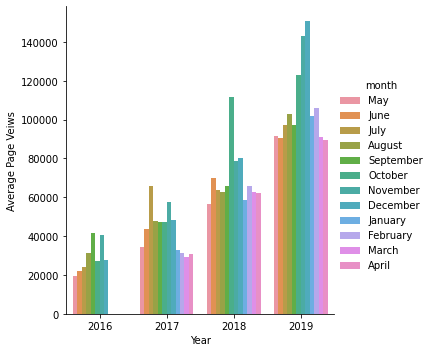

In [ ]:
df2=df.copy()
df2=df2.reset_index()
df2['month']=df2['date'].dt.month
df2['year']=df2['date'].dt.year
# df3=df2.melt(id_vars=["year"],value_vars=[''])
df2=df2.groupby(['year','month']).mean()
# df2=df2.set_index('year')
# fig,ax=plt.subplots()
# df2['value']
df2=df2.reset_index()
df2['month']=df2['month'].astype('str')
months={'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'}
df2['month']=df2['month'].map(months)
df2['Year']=df2['year']
df2['Average Page Veiws']=df2['value']
sns.catplot(data=df2,x='Year',y='Average Page Veiws',hue='month',kind='bar')
# plt.bar(df2['year'],df2['value'],hue=df2['month'])